## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

![alt text](onsets.png)

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_data, sr = librosa.load('audio/drums0.wav')

In [79]:
window_size = 2048
wait_time = 1024
onsets = []
onset_indices = []
counter = 0

for i, audio in enumerate(audio_data): 
    counter +=1
    if i < (len(audio_data)-window_size):
        #need to create a bigger window so you need to minus out the i value too
        start = max(0, i-window_size)
        end = i+window_size
        window = audio_data[start:end]
        if audio == np.max(window):
            if audio > np.mean(window):
                if counter > 1024:
                    onsets.append(audio)
                    onset_indices.append(i)
                    counter = 0   

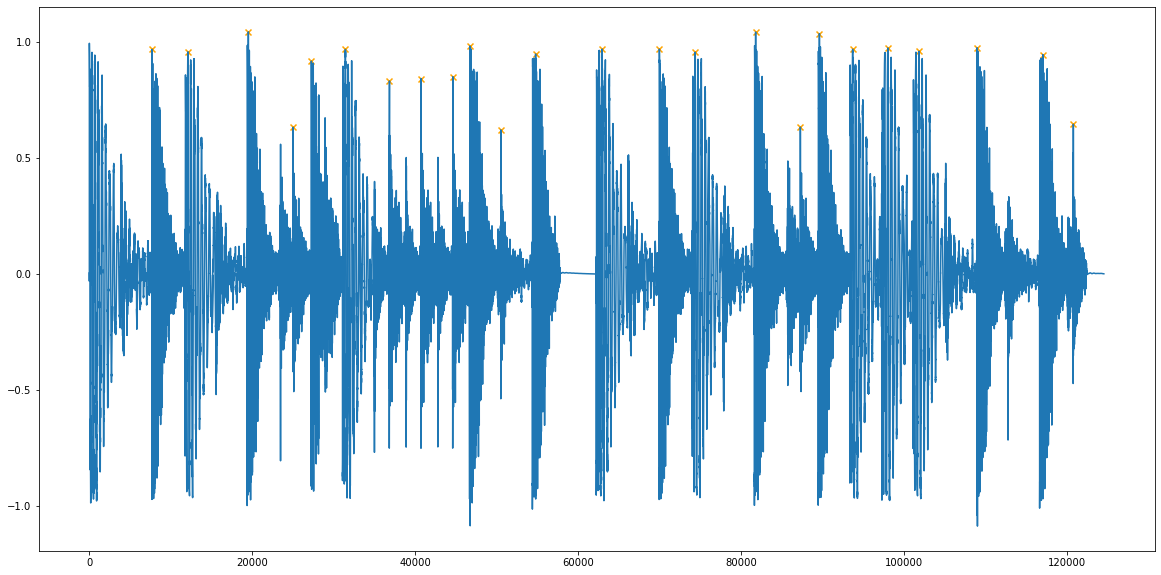

In [80]:
## plot audio file
fig, ax = plt.subplots(figsize=(20,10))
audio_plot = plt.plot(audio_data)
plt.scatter(onset_indices, onsets,color = "orange", marker = "x")

### Task 2 

Experiment with different settings for the your onset detector.

Provide a short discussion (max 250 words) on the advantages and disadvantages from having longer or shorter  ``window_size``s and ``wait_time``s.

Response to Task 2

Being able to adjust our window_size and wait_time values is both an advantage and a disadvantage. By adjusting these values, we either reduce or increase the number of data points collected by the code. If we decrease our window_size, we create more windows for the code to loop through. When we cycle through these smaller windows we can catch some of the less extreme peaks in our data that are otherwise overshadowed by their larger valued neighbors. 

The wait_time works similarly. The wait_time directly refers to how often we catch a peak in the data. When we decrease the wait_time, we catch more peaks simply because we are increasing the number of data points considered to be a peak. When we increase the wait_time, we are limiting the number of data_points considered to be a peak, i.e. taking only the largest of a larger sample. 

Why are these both advantages and disadvantages? That simply depends on the type of questions you are asking about the dataset. If you want to catch as many peaks as possible, a large window_size and wait_time will be a disadvantage. If, however, you want to catch only the most extreme onsets, a larger window_size and wait_time will be an advantage. The determination of an advantage or disadvantage of these two variables is based on what you want to learn from the data and whether the variables are set in a way that will tell you that information. 